## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  88.278747   201.033912  0.735871  5.924497  1.046917
1  29.122667   608.805419  0.248453  5.586259  1.449811
2  77.780143  1299.655380  0.851151  6.450358  1.481830
3  10.293569  1633.877601  0.983383  7.300889  1.633544
4  35.962994  1197.315762  0.503097  9.071198  1.532096


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 1.0695075	total: 73ms	remaining: 1m 12s
1:	learn: 1.0575958	total: 73.5ms	remaining: 36.7s
2:	learn: 1.0474799	total: 74.8ms	remaining: 24.9s
3:	learn: 1.0359324	total: 75.8ms	remaining: 18.9s
4:	learn: 1.0247093	total: 76.7ms	remaining: 15.3s
5:	learn: 1.0126636	total: 77.6ms	remaining: 12.9s
6:	learn: 0.9997270	total: 78.5ms	remaining: 11.1s
7:	learn: 0.9863294	total: 79.1ms	remaining: 9.8s
8:	learn: 0.9741649	total: 80.2ms	remaining: 8.83s
9:	learn: 0.9631762	total: 81.3ms	remaining: 8.04s
10:	learn: 0.9533041	total: 81.9ms	remaining: 7.36s
11:	learn: 0.9419013	total: 83.2ms	remaining: 6.85s
12:	learn: 0.9339256	total: 84.6ms	remaining: 6.42s
13:	learn: 0.9233245	total: 86ms	remaining: 6.05s
14:	learn: 0.9108670	total: 87.3ms	remaining: 5.73s
15:	learn: 0.9013264	total: 88.3ms	remaining: 5.43s
16:	learn: 0.8919644	total: 89.3ms	remaining: 5.17s
17:	learn: 0.8826744	total: 90ms	remaining: 4.91s
18:	learn: 0.8749586	total: 90.9ms	remaining: 4.69

108:	learn: 0.3958089	total: 170ms	remaining: 1.39s
109:	learn: 0.3937085	total: 171ms	remaining: 1.38s
110:	learn: 0.3906926	total: 172ms	remaining: 1.37s
111:	learn: 0.3878634	total: 172ms	remaining: 1.36s
112:	learn: 0.3847565	total: 172ms	remaining: 1.35s
113:	learn: 0.3823459	total: 175ms	remaining: 1.36s
114:	learn: 0.3796842	total: 176ms	remaining: 1.35s
115:	learn: 0.3765461	total: 177ms	remaining: 1.35s
116:	learn: 0.3741092	total: 178ms	remaining: 1.34s
117:	learn: 0.3704423	total: 179ms	remaining: 1.34s
118:	learn: 0.3683092	total: 179ms	remaining: 1.33s
119:	learn: 0.3657541	total: 180ms	remaining: 1.32s
120:	learn: 0.3635950	total: 180ms	remaining: 1.31s
121:	learn: 0.3609868	total: 181ms	remaining: 1.3s
122:	learn: 0.3586320	total: 181ms	remaining: 1.29s
123:	learn: 0.3562174	total: 182ms	remaining: 1.29s
124:	learn: 0.3534397	total: 183ms	remaining: 1.28s
125:	learn: 0.3508381	total: 185ms	remaining: 1.28s
126:	learn: 0.3490926	total: 187ms	remaining: 1.28s
127:	learn: 0

240:	learn: 0.1993619	total: 332ms	remaining: 1.05s
241:	learn: 0.1984923	total: 334ms	remaining: 1.04s
242:	learn: 0.1975128	total: 336ms	remaining: 1.04s
243:	learn: 0.1968626	total: 338ms	remaining: 1.05s
244:	learn: 0.1958927	total: 339ms	remaining: 1.04s
245:	learn: 0.1949637	total: 340ms	remaining: 1.04s
246:	learn: 0.1940323	total: 342ms	remaining: 1.04s
247:	learn: 0.1934032	total: 344ms	remaining: 1.04s
248:	learn: 0.1926287	total: 345ms	remaining: 1.04s
249:	learn: 0.1915171	total: 347ms	remaining: 1.04s
250:	learn: 0.1904826	total: 347ms	remaining: 1.04s
251:	learn: 0.1895419	total: 349ms	remaining: 1.03s
252:	learn: 0.1887338	total: 350ms	remaining: 1.03s
253:	learn: 0.1878761	total: 351ms	remaining: 1.03s
254:	learn: 0.1870698	total: 352ms	remaining: 1.03s
255:	learn: 0.1862610	total: 353ms	remaining: 1.02s
256:	learn: 0.1857537	total: 354ms	remaining: 1.02s
257:	learn: 0.1853021	total: 355ms	remaining: 1.02s
258:	learn: 0.1845308	total: 356ms	remaining: 1.02s
259:	learn: 

367:	learn: 0.1221052	total: 484ms	remaining: 832ms
368:	learn: 0.1216759	total: 485ms	remaining: 830ms
369:	learn: 0.1212540	total: 486ms	remaining: 827ms
370:	learn: 0.1211266	total: 487ms	remaining: 825ms
371:	learn: 0.1207129	total: 488ms	remaining: 824ms
372:	learn: 0.1205884	total: 489ms	remaining: 822ms
373:	learn: 0.1202519	total: 490ms	remaining: 821ms
374:	learn: 0.1197523	total: 491ms	remaining: 819ms
375:	learn: 0.1196301	total: 492ms	remaining: 817ms
376:	learn: 0.1190573	total: 493ms	remaining: 814ms
377:	learn: 0.1186649	total: 494ms	remaining: 812ms
378:	learn: 0.1185451	total: 495ms	remaining: 810ms
379:	learn: 0.1182202	total: 496ms	remaining: 809ms
380:	learn: 0.1178254	total: 497ms	remaining: 808ms
381:	learn: 0.1177080	total: 499ms	remaining: 807ms
382:	learn: 0.1173204	total: 500ms	remaining: 806ms
383:	learn: 0.1170045	total: 501ms	remaining: 804ms
384:	learn: 0.1168997	total: 502ms	remaining: 802ms
385:	learn: 0.1167965	total: 505ms	remaining: 803ms
386:	learn: 

516:	learn: 0.0777792	total: 633ms	remaining: 591ms
517:	learn: 0.0775851	total: 634ms	remaining: 590ms
518:	learn: 0.0772784	total: 636ms	remaining: 589ms
519:	learn: 0.0769811	total: 639ms	remaining: 590ms
520:	learn: 0.0767924	total: 640ms	remaining: 588ms
521:	learn: 0.0764959	total: 641ms	remaining: 587ms
522:	learn: 0.0762536	total: 642ms	remaining: 585ms
523:	learn: 0.0759890	total: 643ms	remaining: 584ms
524:	learn: 0.0758036	total: 644ms	remaining: 582ms
525:	learn: 0.0755999	total: 646ms	remaining: 582ms
526:	learn: 0.0753281	total: 646ms	remaining: 580ms
527:	learn: 0.0752177	total: 647ms	remaining: 579ms
528:	learn: 0.0750644	total: 649ms	remaining: 577ms
529:	learn: 0.0748377	total: 650ms	remaining: 576ms
530:	learn: 0.0745511	total: 650ms	remaining: 575ms
531:	learn: 0.0743266	total: 651ms	remaining: 573ms
532:	learn: 0.0741072	total: 652ms	remaining: 572ms
533:	learn: 0.0739136	total: 653ms	remaining: 570ms
534:	learn: 0.0737580	total: 654ms	remaining: 568ms
535:	learn: 

653:	learn: 0.0552177	total: 768ms	remaining: 406ms
654:	learn: 0.0551658	total: 770ms	remaining: 406ms
655:	learn: 0.0550613	total: 771ms	remaining: 404ms
656:	learn: 0.0550259	total: 777ms	remaining: 406ms
657:	learn: 0.0549909	total: 779ms	remaining: 405ms
658:	learn: 0.0549112	total: 780ms	remaining: 404ms
659:	learn: 0.0548280	total: 782ms	remaining: 403ms
660:	learn: 0.0546735	total: 783ms	remaining: 402ms
661:	learn: 0.0544098	total: 785ms	remaining: 401ms
662:	learn: 0.0542628	total: 785ms	remaining: 399ms
663:	learn: 0.0539198	total: 786ms	remaining: 398ms
664:	learn: 0.0537353	total: 787ms	remaining: 396ms
665:	learn: 0.0535488	total: 788ms	remaining: 395ms
666:	learn: 0.0534467	total: 789ms	remaining: 394ms
667:	learn: 0.0532675	total: 790ms	remaining: 393ms
668:	learn: 0.0530343	total: 791ms	remaining: 391ms
669:	learn: 0.0527854	total: 792ms	remaining: 390ms
670:	learn: 0.0526855	total: 793ms	remaining: 389ms
671:	learn: 0.0523493	total: 794ms	remaining: 388ms
672:	learn: 

805:	learn: 0.0351175	total: 923ms	remaining: 222ms
806:	learn: 0.0350675	total: 924ms	remaining: 221ms
807:	learn: 0.0350095	total: 925ms	remaining: 220ms
808:	learn: 0.0349079	total: 925ms	remaining: 218ms
809:	learn: 0.0348650	total: 926ms	remaining: 217ms
810:	learn: 0.0348229	total: 927ms	remaining: 216ms
811:	learn: 0.0346934	total: 928ms	remaining: 215ms
812:	learn: 0.0346510	total: 929ms	remaining: 214ms
813:	learn: 0.0346091	total: 930ms	remaining: 213ms
814:	learn: 0.0345573	total: 931ms	remaining: 211ms
815:	learn: 0.0344586	total: 932ms	remaining: 210ms
816:	learn: 0.0344098	total: 933ms	remaining: 209ms
817:	learn: 0.0343659	total: 934ms	remaining: 208ms
818:	learn: 0.0343250	total: 935ms	remaining: 207ms
819:	learn: 0.0341600	total: 935ms	remaining: 205ms
820:	learn: 0.0340346	total: 936ms	remaining: 204ms
821:	learn: 0.0339856	total: 937ms	remaining: 203ms
822:	learn: 0.0339348	total: 939ms	remaining: 202ms
823:	learn: 0.0338738	total: 940ms	remaining: 201ms
824:	learn: 

923:	learn: 0.0245714	total: 1.07s	remaining: 87.8ms
924:	learn: 0.0244920	total: 1.07s	remaining: 86.7ms
925:	learn: 0.0244164	total: 1.07s	remaining: 85.5ms
926:	learn: 0.0243394	total: 1.07s	remaining: 84.3ms
927:	learn: 0.0242070	total: 1.07s	remaining: 83.1ms
928:	learn: 0.0241679	total: 1.07s	remaining: 81.9ms
929:	learn: 0.0241294	total: 1.07s	remaining: 80.7ms
930:	learn: 0.0240555	total: 1.07s	remaining: 79.5ms
931:	learn: 0.0239710	total: 1.07s	remaining: 78.4ms
932:	learn: 0.0239032	total: 1.07s	remaining: 77.2ms
933:	learn: 0.0238330	total: 1.07s	remaining: 76ms
934:	learn: 0.0237958	total: 1.07s	remaining: 74.8ms
935:	learn: 0.0237592	total: 1.08s	remaining: 73.6ms
936:	learn: 0.0237258	total: 1.08s	remaining: 72.4ms
937:	learn: 0.0236929	total: 1.08s	remaining: 71.2ms
938:	learn: 0.0236104	total: 1.08s	remaining: 70ms
939:	learn: 0.0235473	total: 1.08s	remaining: 68.9ms
940:	learn: 0.0234802	total: 1.08s	remaining: 67.7ms
941:	learn: 0.0234483	total: 1.08s	remaining: 66.5

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.24297387570415258


ABC Pre-generator MAE 1.0635977805458217


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

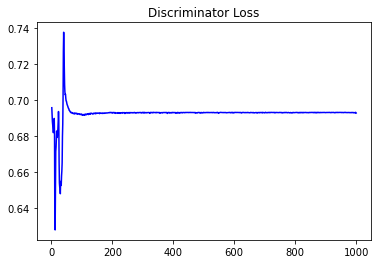

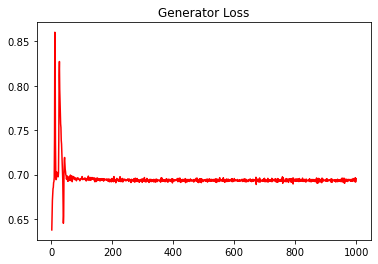

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.3767809061706066


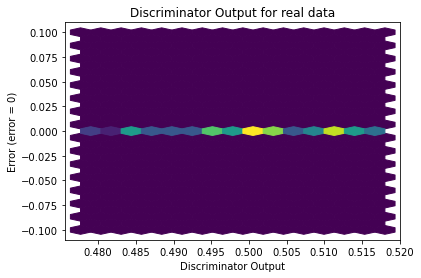

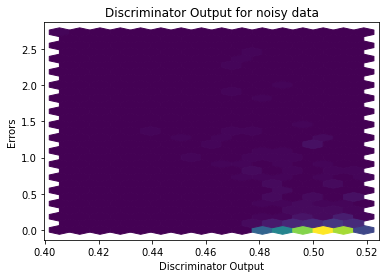

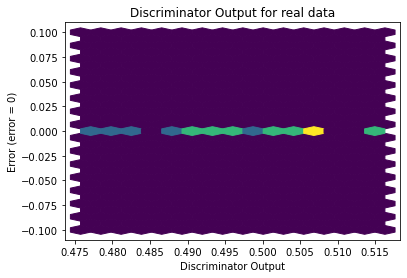

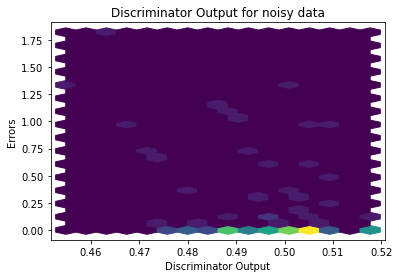

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

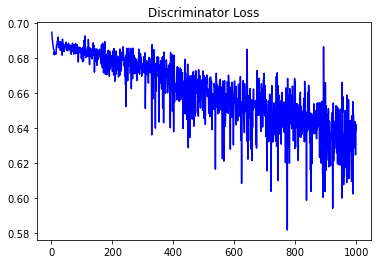

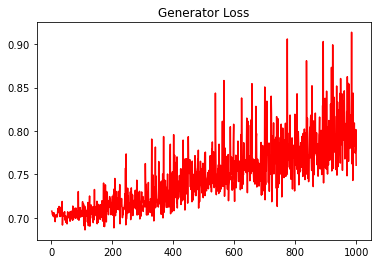

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.4102795757651329


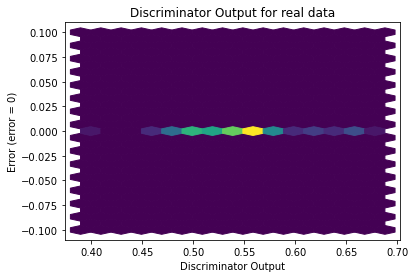

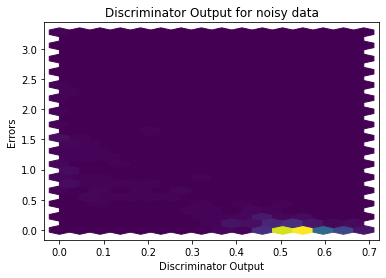

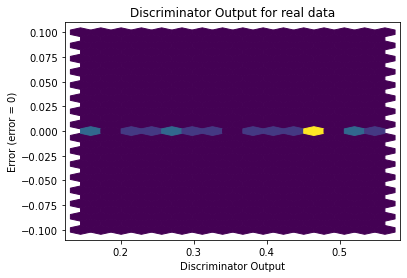

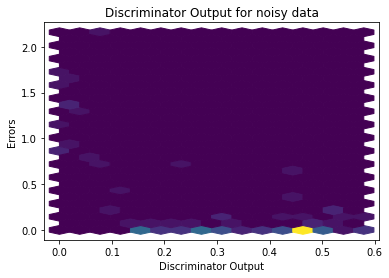

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


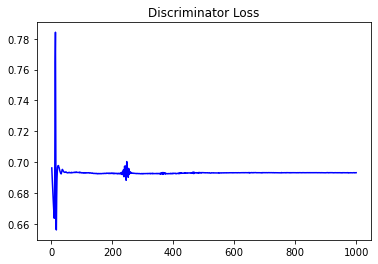

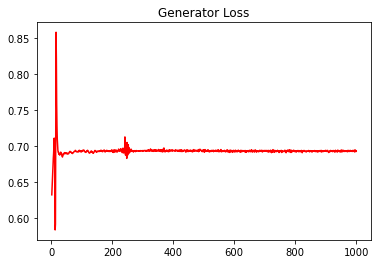

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.22917527386546135


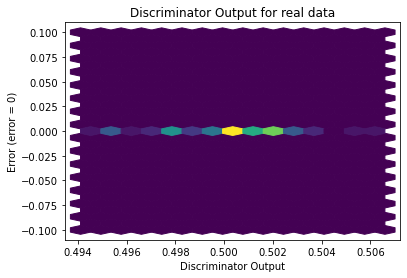

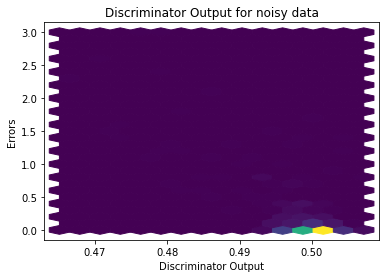

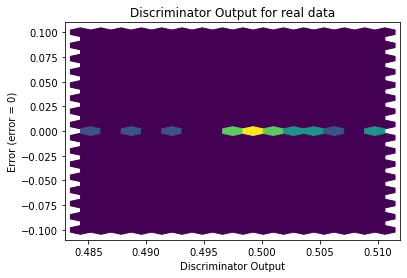

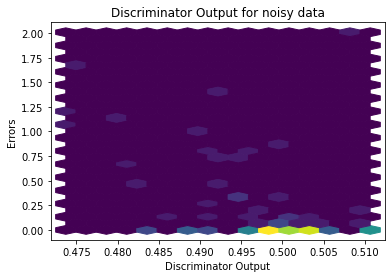

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


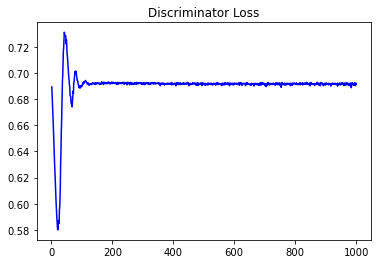

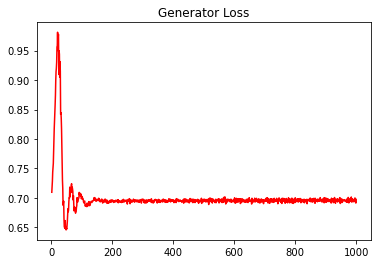

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.2608828582763672


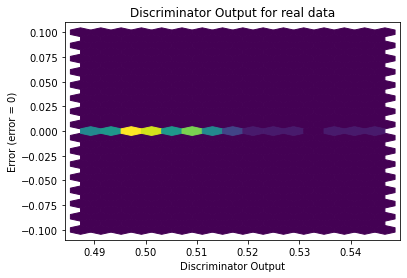

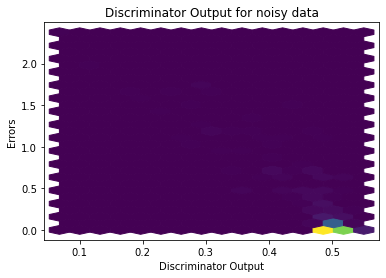

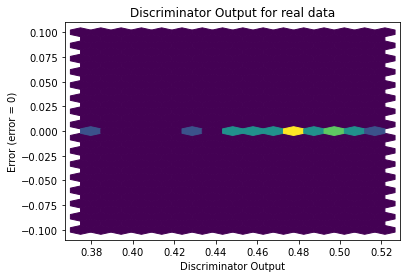

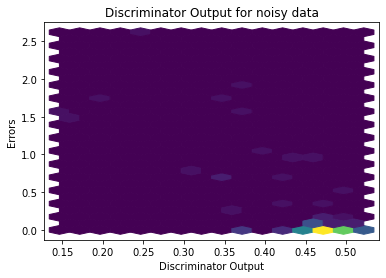

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0675]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1854]], requires_grad=True)
